In [1]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np

labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", header=None, sep="\s+")

X_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+")
y_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None)
X_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", header=None, sep="\s+")
y_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X_test = X_test_val[0:round(0.9*X_test_val.shape[0])] 
X_val = X_test_val[round(0.9*X_test_val.shape[0]):] 
y_test = y_test_val[0:round(0.9*y_test_val.shape[0])] 
y_val = y_test_val[round(0.9*y_test_val.shape[0]):] 

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_val = to_categorical(y_val)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, labels.shape

((7352, 561, 1), (7352, 7), (2652, 561), (2652, 1), (6, 2))

In [3]:
from keras import Sequential
from keras.layers import *
from keras.optimizers import *
import keras

modelo = Sequential()
modelo.add(Bidirectional(LSTM(355, return_sequences=True)))
modelo.add(Dropout(0.2592))
modelo.add(Bidirectional(LSTM(347)))
modelo.add(Dropout(0.3632))
modelo.add(Dense(7, activation="sigmoid"))

modelo.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy", "precision", "recall", "f1_score"])

In [4]:
historico = modelo.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 2048s 3s/step - accuracy: 0.4142 - f1_score: 0.3492 - loss: 0.2980 - precision: 0.4632 - recall: 0.2279 - val_accuracy: 0.8034 - val_f1_score: 0.7073 - val_loss: 0.1341 - val_precision: 0.8481 - val_recall: 0.7763
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 1881s 3s/step - accuracy: 0.7604 - f1_score: 0.6422 - loss: 0.1514 - precision: 0.7754 - recall: 0.7236 - val_accuracy: 0.7051 - val_f1_score: 0.6158 - val_loss: 0.1574 - val_precision: 0.7029 - val_recall: 0.7458
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 2002s 3s/step - accuracy: 0.8101 - f1_score: 0.6881 - loss: 0.1225 - precision: 0.8337 - recall: 0.7849 - val_accuracy: 0.5763 - val_f1_score: 0.4862 - val_loss: 0.2309 - val_precision: 1.0000 - val_recall: 0.3153
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3490s 5s/step - accuracy: 0.6198 - f1_score: 0.5034 - loss: 0.2118 - precision: 0.8232 - recall: 0.4581 - val_accuracy: 0.7593 - val_f1_score: 0.6679 - val_loss: 0.1581 - val_precision: 0.9925 - val

In [5]:
_, precisao, precision, recall, f1_score = modelo.evaluate(X_test, y_test_cat)
print(f"Precisão do modelo: {precisao*100} %")
print(f"Precision do modelo: {precision*100} %")
print(f"Recall do modelo: {recall*100} %")
print(f"F1-Score do modelo: {f1_score[-1]*100} %")

83/83 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.7625 - f1_score: 0.6291 - loss: 0.1797 - precision: 0.7656 - recall: 0.7660
Precisão do modelo: 79.26093339920044 %
Precision do modelo: 79.89317178726196 %
Recall do modelo: 78.95927429199219 %
F1-Score do modelo: 97.36007690429688 %


Text(0.5, 0, 'Precisão')

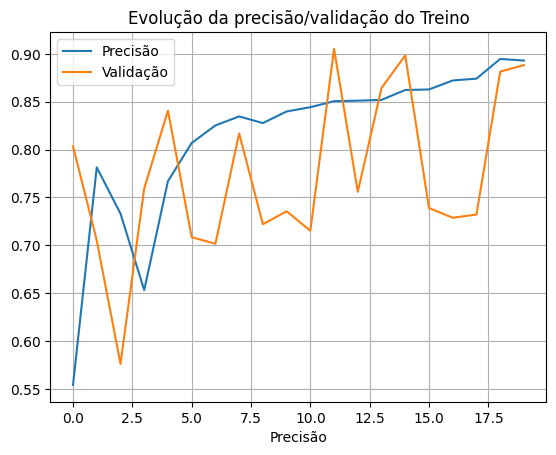

In [6]:
import matplotlib.pyplot as plt

plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.grid()
plt.title("Evolução da precisão/validação do Treino")
plt.legend(["Precisão", "Validação"])
plt.xlabel("Época")
plt.xlabel("Precisão")

83/83 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step


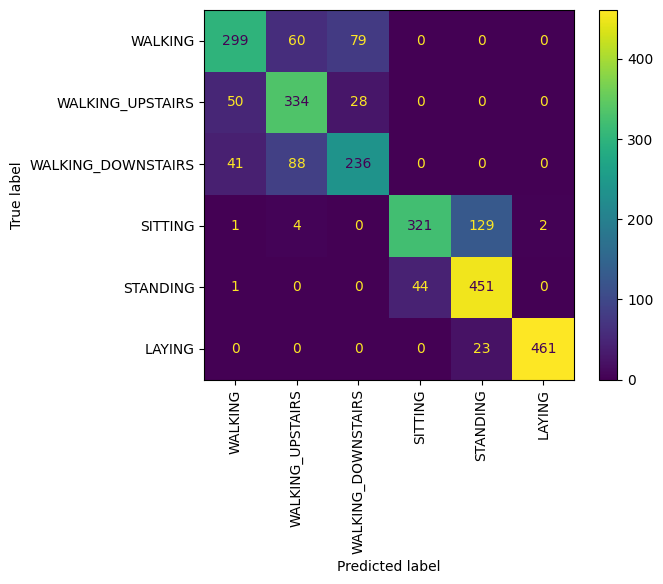

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_previsto = modelo.predict(X_test)
y_previsto = [np.argmax(y) for y in y_previsto]

cm = confusion_matrix(y_test, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation="vertical")